# Classification Performance

This notebook plots accuracy curves on the CIFAR10 test set for each combination of model parameters (different combinations of retinal bottleneck and ventral stream depth). It corresponds to Figure 4 in the Appendix.

**Note**: The easiest way to use this is as a colab notebook, which allows you to dive in with no setup.

## Load Dependencies - Colab Only

In [ ]:
from os.path import exists
if not exists('opponency.zip'):
    !wget -O opponency.zip https://github.com/ecs-vlc/opponency/archive/master.zip
    !unzip -qq opponency.zip
    !mv opponency-master/* ./
    !rm -r opponency-master

## Generate Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

bottlenecks = [1,2,4,8,16,32]
ventral_depths = [0,1,2,3,4,5,6]
n_trials = 10
cmodes=['grey', 'colour']

def read_csv(n_bn, d_vvs, t, cmode):
    log_file = f'./logs/{cmode}/model_{n_bn}_{d_vvs}_{t}.csv'
    with open(log_file) as csvfile:
        reader = csv.DictReader(csvfile)
        data = []
        for row in reader:
            data.append(row)
        return data


def get_acc_avg_sem(n_bn, d_vvs, cmode, epoch=19):
    # get the mean and standard error of the test accuracy across the trials
    accs = []
    for t in range(n_trials):
        data = read_csv(n_bn, d_vvs, t, cmode)
        data = list(filter(lambda r: r['epoch']==str(epoch), data))[0]
        test_acc = data['val_acc']
        accs.append(float(test_acc))
    arr = np.array(accs)
    return arr.mean(), arr.std() / np.sqrt(arr.shape[0])

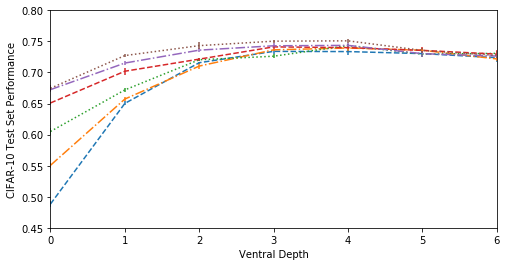

In [2]:
plt.figure(figsize=(8,4))
lines = [':', '-.', '--', ':', '-.', '--']
for n_bn in bottlenecks:
    means = []
    sems = []
    for d_vvs in ventral_depths:
        mu, se = get_acc_avg_sem(n_bn, d_vvs, 'grey')
        means.append(mu)
        sems.append(se)
    plt.errorbar(ventral_depths, means, yerr=sems, linestyle=lines.pop())
plt.xlabel('Ventral Depth')
plt.ylabel('CIFAR-10 Test Set Performance')
plt.xticks(range(len(ventral_depths)), ventral_depths)
plt.xlim(0, 6)
plt.ylim(0.45,0.8)
plt.savefig("figures/greyscale_accuracy.eps",  bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


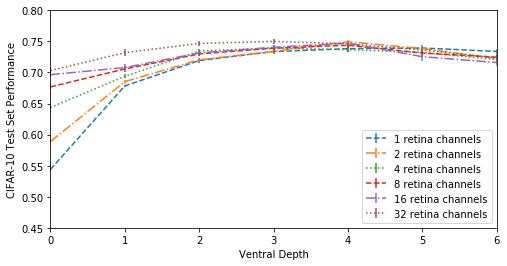

In [3]:
markers = ['o', 's', 'v', 'P', 'D', '^']
lines = [':', '-.', '--', ':', '-.', '--']

plt.figure(figsize=(8,4))
for n_bn in bottlenecks:
    means = []
    sems = []
    for d_vvs in ventral_depths:
        mu, se = get_acc_avg_sem(n_bn, d_vvs, 'colour')
        means.append(mu)
        sems.append(se)
    plt.errorbar(ventral_depths, means, yerr=sems,linestyle=lines.pop()) # marker=markers.pop()
plt.legend([str(w)+' retina channels' for w in bottlenecks])
plt.xlabel('Ventral Depth')
plt.ylabel('CIFAR-10 Test Set Performance')
plt.xticks(range(len(ventral_depths)), ventral_depths)

plt.xlim(0, 6)
plt.ylim(0.45,0.8)
plt.ylim()
plt.savefig('figures/accuracy.eps', bbox_inches='tight')
plt.show()
